In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/Rehaman shaik/Desktop/data science practice session/assisgments/association rule/my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
# Convert binary values to boolean for better representation

In [5]:
df_boolean = df.astype(bool)
df_boolean

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,True,True,True,True,True,True,False,True,True,False,True,False,False,False,True
1,True,True,True,True,True,False,True,False,False,True,False,False,False,True,False
2,True,True,True,True,True,False,False,True,False,False,True,False,False,False,False
3,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False
4,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False
5,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False
6,True,True,True,True,True,False,False,False,True,False,False,True,False,False,False
7,True,True,True,True,True,False,True,False,False,True,False,False,False,False,False
8,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False
9,True,True,True,True,True,True,True,False,False,False,False,False,True,False,True


In [6]:
# Vary support and confidence values
support_values = [0.1, 0.2, 0.3]
confidence_values = [0.5, 0.6, 0.7]

In [7]:
for support in support_values:
    for confidence in confidence_values:
        frequent_itemsets = apriori(df_boolean, min_support=support, use_colnames=True)
        
        if frequent_itemsets.empty:
            print(f"\nSupport: {support}, Confidence: {confidence}")
            print("No frequent itemsets found.")
        else:
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
            
            print(f"\nSupport: {support}, Confidence: {confidence}")
            print(f"Number of Rules: {len(rules)}")
            print(rules)


Support: 0.1, Confidence: 0.5
Number of Rules: 64906
            antecedents                                        consequents  \
0                  (V1)                                               (V2)   
1                  (V2)                                               (V1)   
2                  (V3)                                               (V1)   
3                  (V1)                                               (V3)   
4                  (V4)                                               (V1)   
...                 ...                                                ...   
64901  (Green Mile, V2)  (V3, V4, LOTR2, Harry Potter1, V1, LOTR1, Sixt...   
64902           (LOTR2)  (V3, V4, Harry Potter1, V1, LOTR1, Sixth Sense...   
64903   (Harry Potter1)  (V3, V4, LOTR2, V1, LOTR1, Sixth Sense, V5, V2...   
64904           (LOTR1)  (V3, V4, LOTR2, Harry Potter1, V1, Sixth Sense...   
64905      (Green Mile)  (V3, V4, LOTR2, Harry Potter1, V1, LOTR1, Sixt...   

       an

In [8]:
min_length_values = [2, 3, 4]

for min_length in min_length_values:
    frequent_itemsets = apriori(df_boolean, min_support=0.2, use_colnames=True, max_len=min_length)
    
    if frequent_itemsets.empty:
        print(f"\nMin Length: {min_length}")
        print("No frequent itemsets found.")
    else:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
        
        print(f"\nMin Length: {min_length}")
        print(f"Number of Rules: {len(rules)}")
        print(rules)


Min Length: 2
Number of Rules: 79
     antecedents    consequents  antecedent support  consequent support  \
0           (V1)           (V2)                 1.0                 1.0   
1           (V2)           (V1)                 1.0                 1.0   
2           (V3)           (V1)                 1.0                 1.0   
3           (V1)           (V3)                 1.0                 1.0   
4           (V4)           (V1)                 1.0                 1.0   
..           ...            ...                 ...                 ...   
74  (Green Mile)  (Sixth Sense)                 0.2                 0.6   
75     (Patriot)    (Gladiator)                 0.6                 0.7   
76   (Gladiator)      (Patriot)                 0.7                 0.6   
77       (LOTR2)        (LOTR1)                 0.2                 0.2   
78       (LOTR1)        (LOTR2)                 0.2                 0.2   

    support  confidence      lift  leverage  conviction  zhangs_

In [9]:
# Visualization example using scatter plot

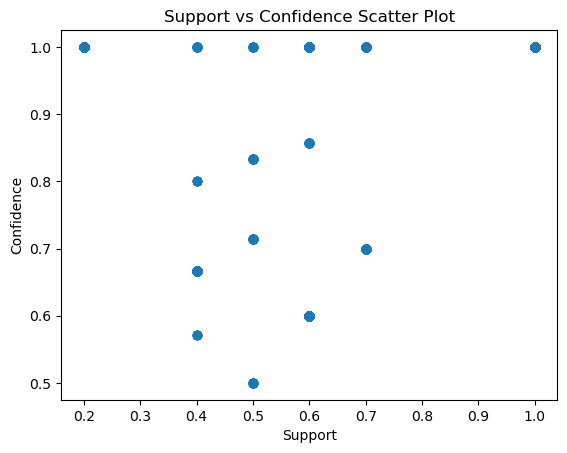

In [10]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence Scatter Plot')
plt.show()

In [11]:

# Histogram of Rule Distribution based on Support

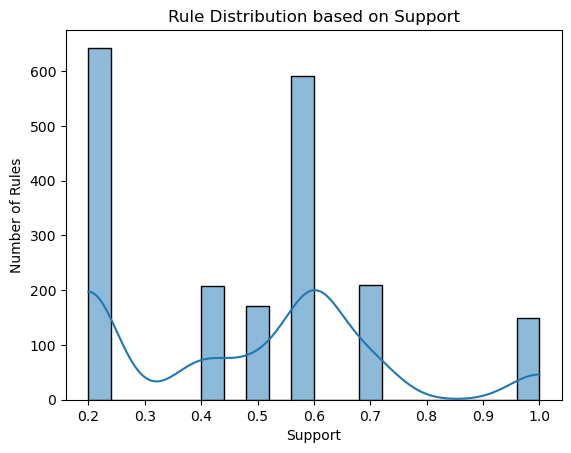

In [12]:
import seaborn as sns
sns.histplot(rules['support'], bins=20, kde=True)
plt.xlabel('Support')
plt.ylabel('Number of Rules')
plt.title('Rule Distribution based on Support')
plt.show()
